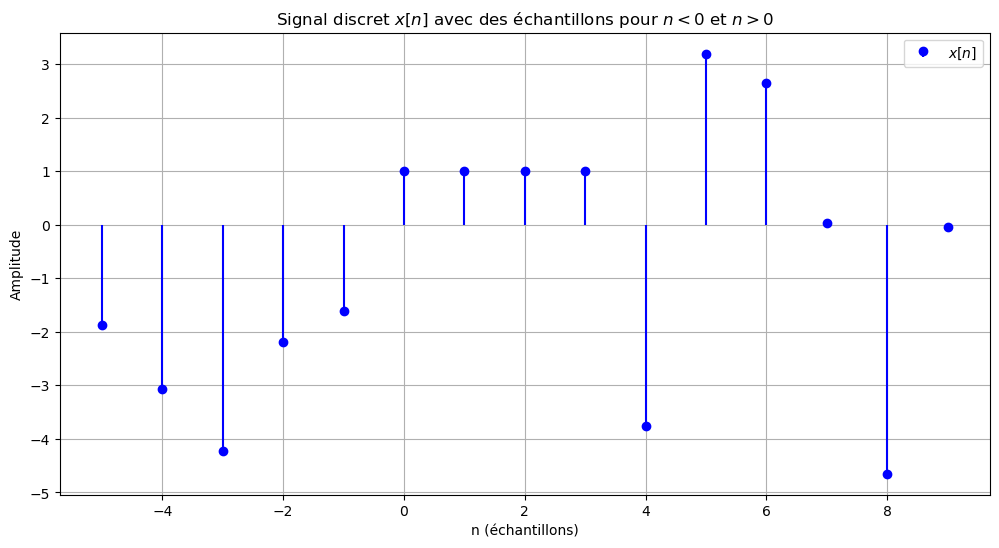

In [1]:
# Activer l'affichage dans le notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Paramètres
N_positive = 10  # Nombre d'échantillons pour n >= 0
N_negative = 5   # Nombre d'échantillons pour n < 0
n = np.arange(-N_negative, N_positive)  # Indices allant de -5 à 9

# Initialisation avec des valeurs négatives et des impulsions
x_n = np.zeros(len(n))  # Initialisation
x_n[N_negative + 0] = 1  # delta[n] à n=0
x_n[N_negative + 1] = 1  # delta[n-1] à n=1
x_n[N_negative + 2] = 1  # delta[n-2] à n=2
x_n[N_negative + 3] = 1  # delta[n-3] à n=3

# Ajouter des valeurs négatives pour n < 0
x_n[:N_negative] = np.random.uniform(-5, -1, size=N_negative)  # Valeurs négatives

# Ajouter des valeurs aléatoires pour n > 3
x_n[N_negative + 4:] = np.random.uniform(-5, 5, size=N_positive - 4)  # Mélange de négatifs et positifs

# Tracer le signal
plt.figure(figsize=(12, 6))
plt.stem(n, x_n, basefmt=" ", linefmt="blue", markerfmt="bo", label='$x[n]$')
plt.title("Signal discret $x[n]$ avec des échantillons pour $n < 0$ et $n > 0$")
plt.xlabel("n (échantillons)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

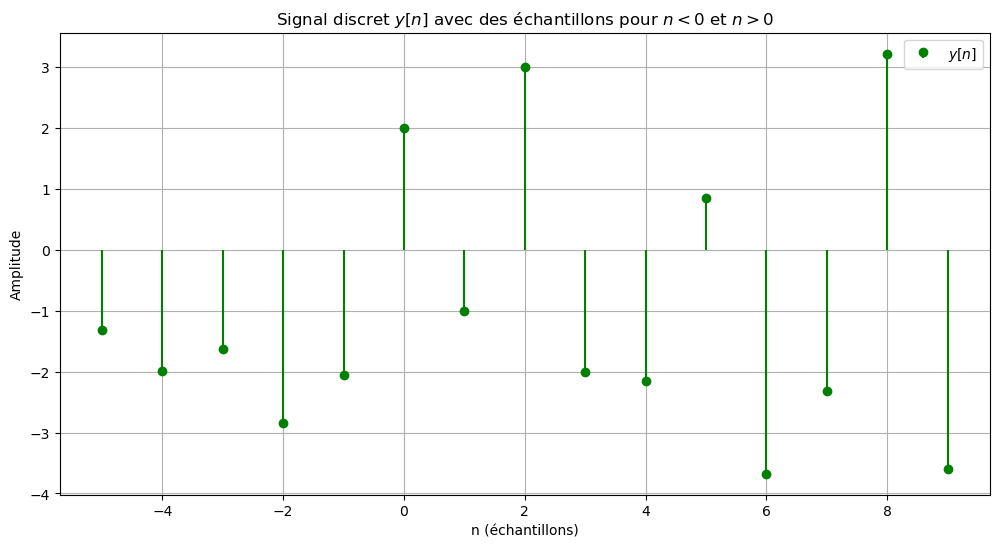

In [3]:
# Activer l'affichage dans le notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Paramètres
N_positive = 10  # Nombre d'échantillons pour n >= 0
N_negative = 5   # Nombre d'échantillons pour n < 0
n = np.arange(-N_negative, N_positive)  # Indices allant de -5 à 9

# Initialisation de y[n] avec des valeurs différentes
y_n = np.zeros(len(n))  # Initialisation
y_n[N_negative + 0] = 2  # Valeur différente à n=0
y_n[N_negative + 1] = -1  # Valeur différente à n=1
y_n[N_negative + 2] = 3  # Valeur différente à n=2
y_n[N_negative + 3] = -2  # Valeur différente à n=3

# Ajouter des valeurs aléatoires pour n < 0 (négatives)
y_n[:N_negative] = np.random.uniform(-3, -1, size=N_negative)  # Valeurs aléatoires négatives

# Ajouter des valeurs aléatoires pour n > 3 (positives et négatives)
y_n[N_negative + 4:] = np.random.uniform(-4, 4, size=N_positive - 4)

# Tracer le signal y[n]
plt.figure(figsize=(12, 6))
plt.stem(n, y_n, basefmt=" ", linefmt="green", markerfmt="go", label='$y[n]$')
plt.title("Signal discret $y[n]$ avec des échantillons pour $n < 0$ et $n > 0$")
plt.xlabel("n (échantillons)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()


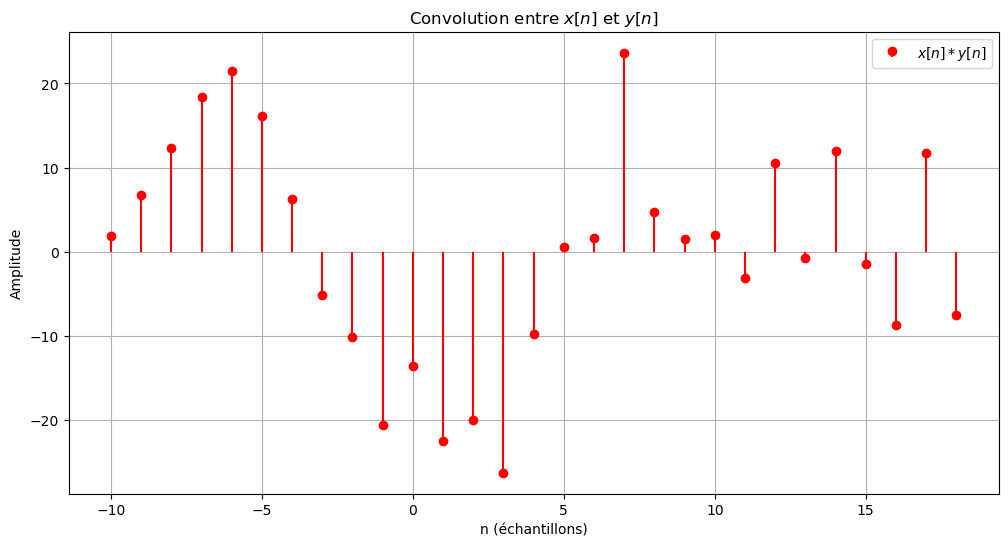

In [5]:
# Activer l'affichage dans le notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Paramètres
N_positive = 10  # Nombre d'échantillons pour n >= 0
N_negative = 5   # Nombre d'échantillons pour n < 0
n = np.arange(-N_negative, N_positive)  # Indices allant de -5 à 9

# Signal x[n]
x_n = np.zeros(len(n))  # Initialisation
x_n[N_negative + 0] = 1  # delta[n]
x_n[N_negative + 1] = 1  # delta[n-1]
x_n[N_negative + 2] = 1  # delta[n-2]
x_n[N_negative + 3] = 1  # delta[n-3
x_n[:N_negative] = np.random.uniform(-5, -1, size=N_negative)  # Valeurs négatives
x_n[N_negative + 4:] = np.random.uniform(-5, 5, size=N_positive - 4)  # Mélange de valeurs

# Signal y[n]
y_n = np.zeros(len(n))  # Initialisation
y_n[N_negative + 0] = 2  # Valeur différente
y_n[N_negative + 1] = -1
y_n[N_negative + 2] = 3
y_n[N_negative + 3] = -2
y_n[:N_negative] = np.random.uniform(-3, -1, size=N_negative)  # Valeurs aléatoires négatives
y_n[N_negative + 4:] = np.random.uniform(-4, 4, size=N_positive - 4)  # Mélange de valeurs

# Convolution des deux signaux
conv_result = np.convolve(x_n, y_n, mode='full')  # Convolution discrète complète
n_conv = np.arange(-2 * N_negative, 2 * N_positive - 1)  # Indices pour le signal convolué

# Tracer la convolution
plt.figure(figsize=(12, 6))
plt.stem(n_conv, conv_result, basefmt=" ", linefmt="red", markerfmt="ro", label='$x[n] * y[n]$')
plt.title("Convolution entre $x[n]$ et $y[n]$")
plt.xlabel("n (échantillons)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()


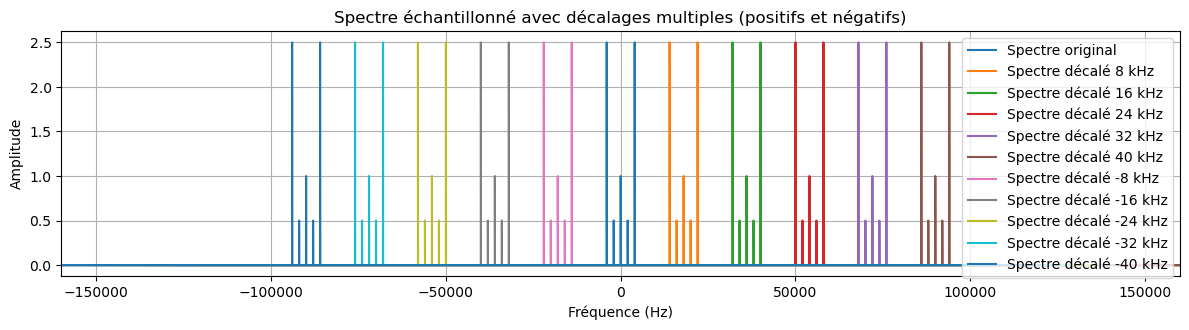

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import resample

# 1. Définition du signal x(t)
fs = 10000  # Fréquence d'échantillonnage initiale (Hz)
T = 1 / fs   # Période d'échantillonnage
t = np.linspace(0, 1, fs, endpoint=False)  # Temps (1 seconde)

# Signal x(t) : composé de sinusoïdes à différentes fréquences
x_t = 1 + np.cos(2 * np.pi * 2000 * t) + 2 * np.cos(2 * np.pi * 4000 * t) + 3 * np.cos(2 * np.pi * 6000 * t)

# 2. Interpolation pour doubler la fréquence d'échantillonnage par un facteur de 32
new_fs = fs * 32  # Nouvelle fréquence d'échantillonnage
new_t = np.linspace(0, 1, new_fs, endpoint=False)  # Nouveau temps échantillonné
x_t_resampled = resample(x_t, len(new_t))  # Interpolation du signal

# 3. Calcul de la FFT du signal rééchantillonné
fft_result_resampled = fft(x_t_resampled)  # Transformée de Fourier rapide
frequencies_resampled = fftfreq(len(x_t_resampled), 1 / new_fs)  # Fréquences associées

# 4. Spectre échantillonné : Décalage du spectre pour visualiser plus clairement
amplitude_shifted_resampled = np.fft.fftshift(np.abs(fft_result_resampled) / len(x_t_resampled))  # Décalage du spectre
frequencies_shifted_resampled = np.fft.fftshift(frequencies_resampled)  # Décalage des fréquences

# 5. Recopier le signal et le spectre à des multiples de ±8 dans le domaine fréquentiel
multiples_positive = [1, 2, 3, 4, 5]  # Décalage par des multiples de 8 (positifs)
multiples_negative = [-1, -2, -3, -4, -5]  # Décalage par des multiples de 8 (négatifs)
x_t_all = np.copy(x_t_resampled)  # Stocker les signaux sur la même courbe
frequencies_all = np.copy(frequencies_shifted_resampled)  # Stocker les fréquences décalées

# Créer de nouvelles versions du signal à des multiples de ±8
for multiple in multiples_positive + multiples_negative:
    # Décalage fréquentiel
    shifted_signal = np.roll(x_t_resampled, multiple * fs)  # Décalage temporel
    x_t_all = np.concatenate([x_t_all, shifted_signal])
    
    # Décalage des fréquences pour la FFT
    shifted_frequencies = frequencies_shifted_resampled + (multiple * 8 * 1000)  # Décalage par des multiples de ±8
    frequencies_all = np.concatenate([frequencies_all, shifted_frequencies])

# 6. Visualisation des signaux et des spectres
plt.figure(figsize=(12, 6))

# Graphique 1: Signal dans le domaine temporel (avant et après interpolation et copies)



# Graphique 2: Spectre échantillonné avec décalages multiples (en incluant les fréquences négatives)
plt.subplot(2, 1, 2)
plt.plot(frequencies_shifted_resampled, amplitude_shifted_resampled, label="Spectre original")
for multiple in multiples_positive + multiples_negative:
    shifted_frequencies = frequencies_shifted_resampled + (multiple * 8 * 1000)
    shifted_amplitude = np.roll(amplitude_shifted_resampled, multiple * fs)
    plt.plot(shifted_frequencies, shifted_amplitude, label=f"Spectre décalé {multiple * 8} kHz")
plt.title("Spectre échantillonné avec décalages multiples (positifs et négatifs)")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(-new_fs/2, new_fs/2)  # Plage de fréquences jusqu'à la fréquence de Nyquist
plt.legend()

plt.tight_layout()
plt.show()


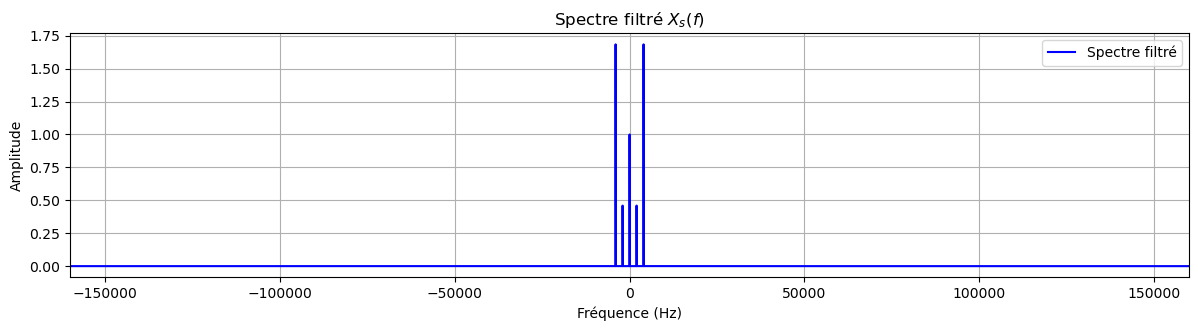

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import resample, firwin, lfilter

# 1. Définition du signal x(t)
fs = 10000  # Fréquence d'échantillonnage initiale (Hz)
T = 1 / fs   # Période d'échantillonnage
t = np.linspace(0, 1, fs, endpoint=False)  # Temps (1 seconde)

# Signal x(t) : composé de sinusoïdes à différentes fréquences
x_t = 1 + np.cos(2 * np.pi * 2000 * t) + 2 * np.cos(2 * np.pi * 4000 * t) + 3 * np.cos(2 * np.pi * 6000 * t)

# 2. Interpolation pour doubler la fréquence d'échantillonnage par un facteur de 32
new_fs = fs * 32  # Nouvelle fréquence d'échantillonnage
new_t = np.linspace(0, 1, new_fs, endpoint=False)  # Nouveau temps échantillonné
x_t_resampled = resample(x_t, len(new_t))  # Interpolation du signal

# 3. Création du filtre passe-bas
cutoff_freq = 5000  # Fréquence de coupure du filtre passe-bas (Hz)
numtaps = 101  # Nombre de taps (coefficients) pour le filtre FIR
lowpass_filter = firwin(numtaps, cutoff_freq, fs=new_fs)  # Créer le filtre FIR passe-bas

# 4. Application du filtre passe-bas
x_t_filtered = lfilter(lowpass_filter, 1.0, x_t_resampled)

# 5. Calcul de la FFT du signal filtré
fft_result_filtered = fft(x_t_filtered)  # Transformée de Fourier rapide
frequencies_filtered = fftfreq(len(x_t_filtered), 1 / new_fs)  # Fréquences associées

# 6. Spectre échantillonné : Décalage du spectre pour visualiser plus clairement
amplitude_shifted_filtered = np.fft.fftshift(np.abs(fft_result_filtered) / len(x_t_filtered))  # Décalage du spectre
frequencies_shifted_filtered = np.fft.fftshift(frequencies_filtered)  # Décalage des fréquences

# 7. Visualisation

# Graphique 1: Signal dans le domaine temporel avant et après interpolation et filtrage
plt.figure(figsize=(12, 6))

# Signal original et filtré dans le domaine temporel

# Graphique 2: Spectre échantillonné avant et après interpolation et filtrage
plt.subplot(2, 1, 2)
plt.plot(frequencies_shifted_filtered, amplitude_shifted_filtered, label="Spectre filtré", color="blue")
plt.title("Spectre filtré $X_s(f)$")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(-new_fs/2, new_fs/2)  # Plage de fréquences jusqu'à la fréquence de Nyquist
plt.legend()

plt.tight_layout()
plt.show()
